In [4]:
print("Python běží!")

Python běží!


In [5]:
import sys

sys.path.append('../')
sys.path.append('../my_libs/')
sys.path.append('../my_libs/img/')

!{sys.executable} -m pip install -r ../../pip-dependencies.txt

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import my_libs as ml
from my_libs.tools import *
from my_libs.fft import *
from my_libs.colors import *
from my_libs.img.processing import *

In [7]:
ml.tools.printf("Hello world!")

Hello world!

# Cvičení 4

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Úkol 1.
Použijte funkce z OpenCV pro odstranění šumu - průměrovací filtr a medián. Načtěte obrázek `pvi_cv04.png` a převeďte ho na šedotónový. Pro 
každou použitou funkci zobrazte v jednom okně: původní a filtrovaný obrázek a příslušné histogramy a amplitudová spektra. Pro zobrazení amplitudových 
spekter použijte funkci z minulého cvičení. Naprogramujte vlastní funkci pro filtraci šumu založeném na mediánu (s maskou 5 x 5). Porovnějte v 
samostatném okně vaší funkci s funkcí z OpenCV.

- https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

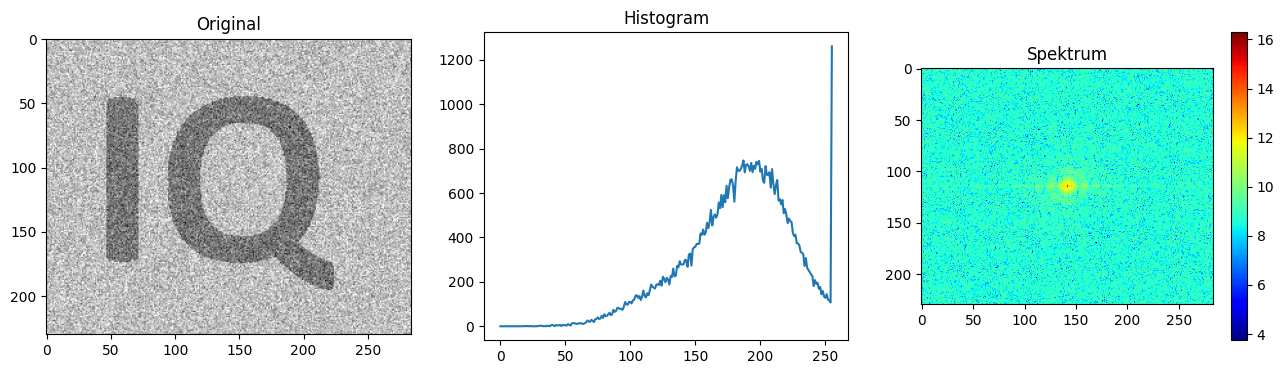

In [9]:
img_file = "pvi_cv04.png"
img = cv2.imread(img_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def amplitude_specter(img):
    fft = np.fft.fft2(img)
    fft = np.fft.fftshift(fft)
    fft = np.log(np.abs(fft))
    return fft

# zobrazení
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

# histogram
plt.subplot(1, 3, 2)
hist, be = np.histogram(gray, bins=256, range=(0, 255))
plt.plot(hist)
plt.title("Histogram")

# spektrum
plt.subplot(1, 3, 3)
fft = amplitude_specter(gray)
plt.imshow(fft, cmap='jet')
plt.colorbar()
plt.title("Spektrum")

plt.show()

In [10]:
medIm = cv2.medianBlur(img, 5) 
averIm = cv2.blur(img, (3, 3)) 

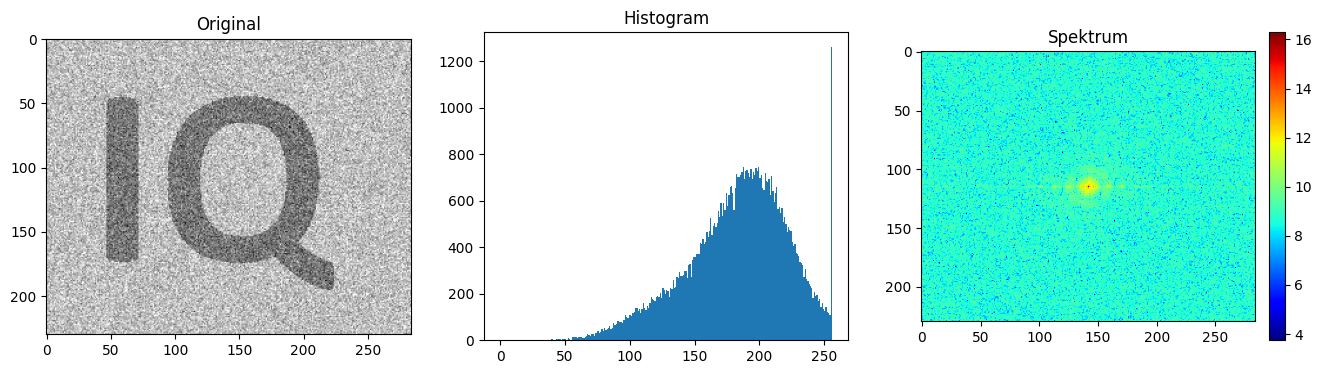

In [11]:
def plot_comparsion(img, title="Original"):
    plot_imgs(
        imgs=[img, img, amplitude_specter(img)], 
        titles=[title, "Histogram", "Spektrum"], 
        rows=1, cmaps=['gray', None, 'jet'], 
        cbars=[None, None, True],
        hist=[None, True, None],
        figsize=(16, 4))

plot_comparsion(gray)

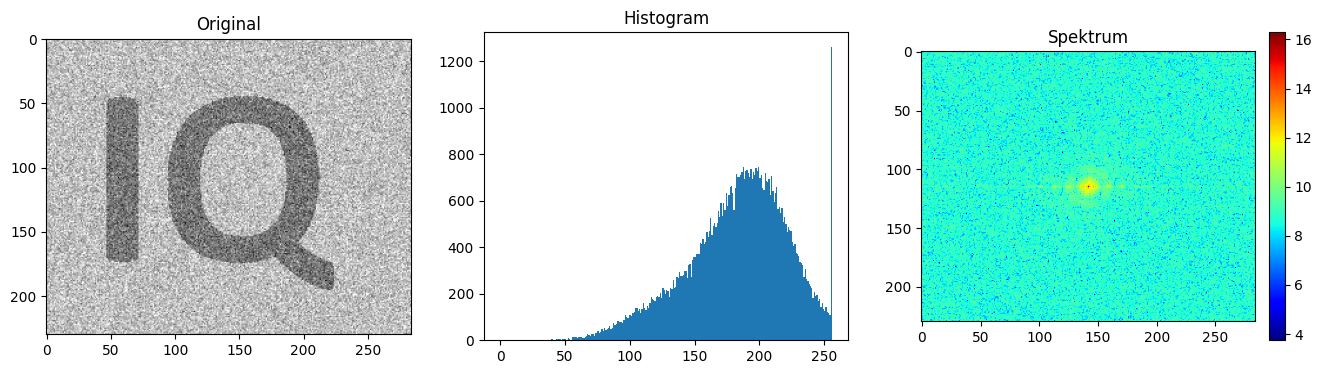

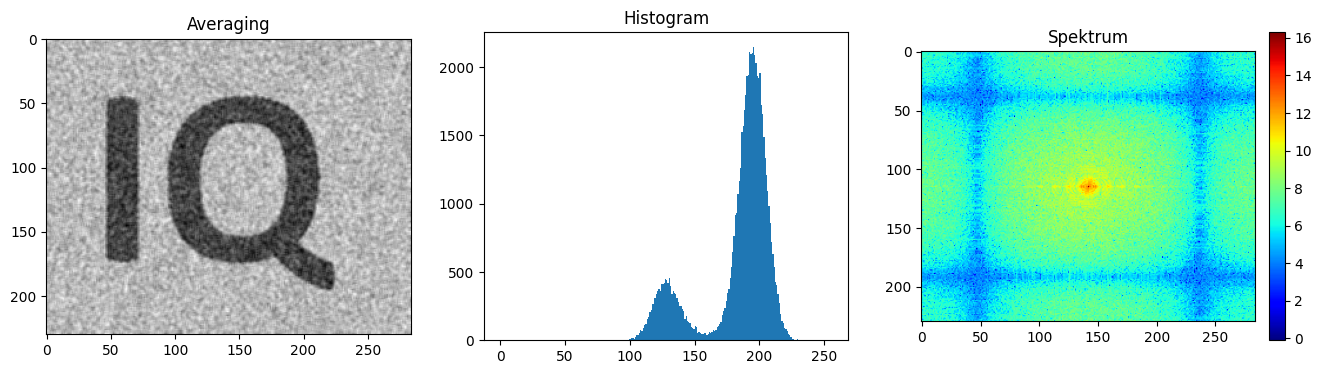

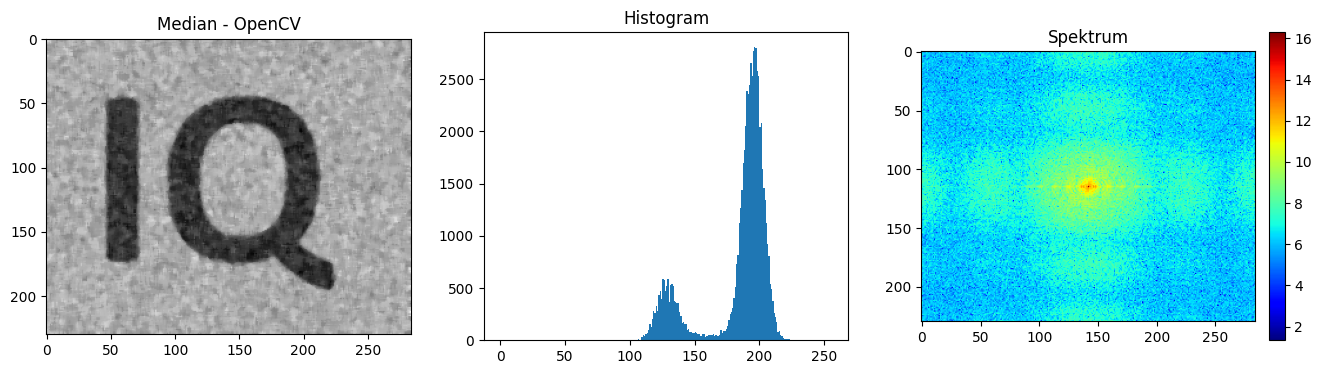

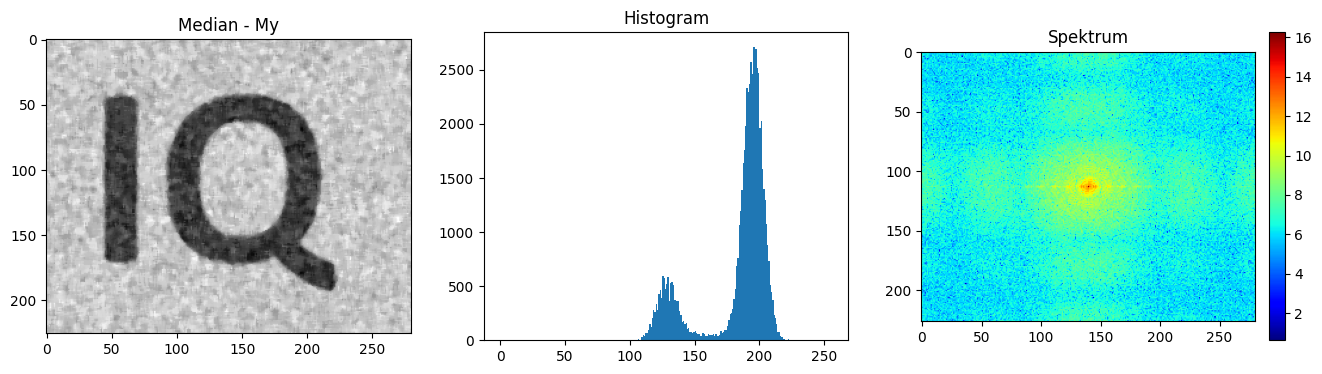

In [12]:
from my_libs.img.filters import median

def do_nothing(x):
    return x

filter_functions = [
    lambda x: do_nothing(x),
    lambda x: cv2.blur(x, (3, 3)),
    lambda x: cv2.medianBlur(x, 5),
    lambda x: median(x, 5)
]

titles = [
    "Original",
    "Averaging",
    "Median - OpenCV",
    "Median - My"
]

for filter_function, title in zip(filter_functions, titles):
    plot_comparsion(filter_function(gray), title)

## Úkol 2.
Načtěte obrázky `pvi_cv04_im01.png` až `pvi_cv04_im06.png`. Obrázky 
převeďte na šedotónové a pro každý obrázek detekujte hrany pomocí 
Cannyho hranového detektoru. Původní obrazek i výsledek z Cannyho 
hranového detektoru převeďte na binární obrazy a spočítejte sumu 
obrazových bodů s hodnotou 1, tuto informaci zobrazte jako 'title' obrázku. 
Všechny obrázky a informace zobrazte v jednom okně. 

- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html 

In [13]:
imC = cv2.Canny(img, 100, 256)

In [14]:
# Load image
from my_libs.img import images
folder = 'data/'
picture_files = images.find(folder)
picture_files.sort()
number_of_images = len(picture_files)
print("Number of images: ", number_of_images)
imgs = images.load(picture_files)

Current working directory: /home/pytel/Skola/TUL-navazující_studium/3. semestr/PVI-Pocitacove_videni/cviceni/cv04, files: 
pvi_cv04_im03.png
pvi_cv04_im06.png
pvi_cv04_im05.png
pvi_cv04_im04.png
pvi_cv04_im01.png
pvi_cv04_im02.png
Number of images:  6


In [ ]:
# grayscale
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]

In [35]:
def binarize(img, threshold=125):
    return cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]

def count_white_pixels(img):
    return np.sum(img == 255)

for img in imgs:
    print("Number of white pixels: ", count_white_pixels(binarize(img)))

Number of white pixels:  10000
Number of white pixels:  2500
Number of white pixels:  40000
Number of white pixels:  10000
Number of white pixels:  2500
Number of white pixels:  40000


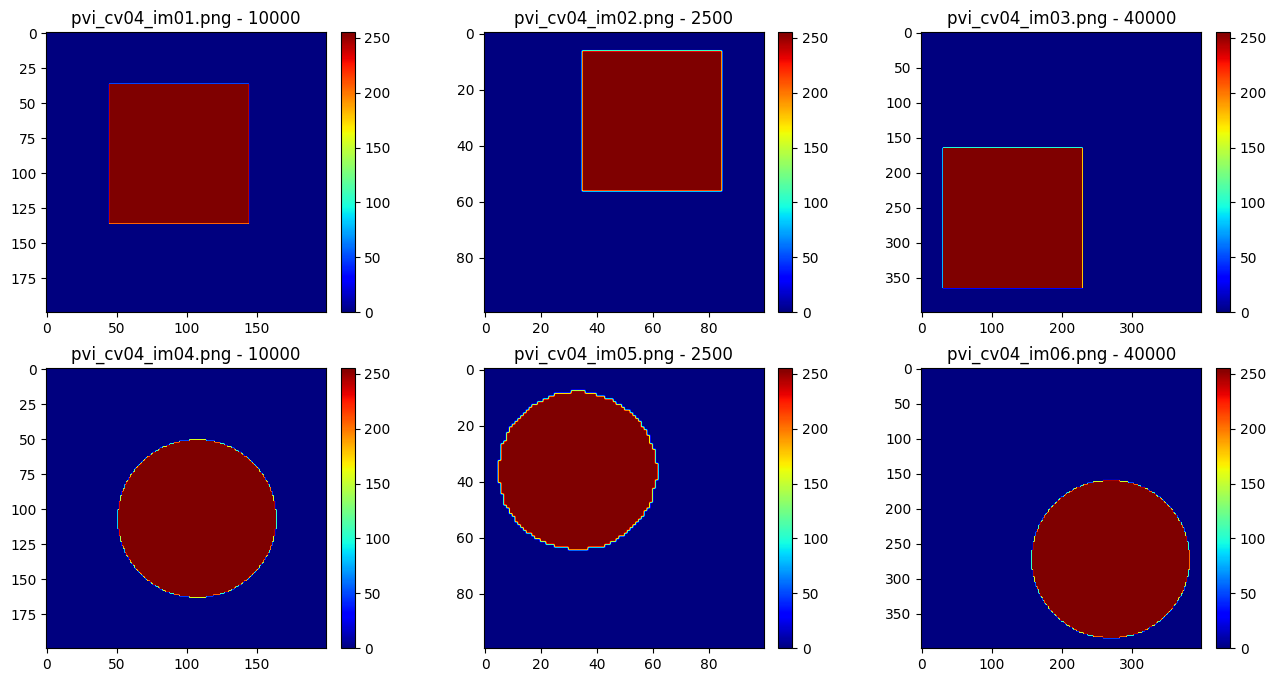

In [36]:
names = [f.split('/')[-1] for f in picture_files]
pixel_counts = [count_white_pixels(binarize(img)) for img in imgs]

names_with_count = [f"{name} - {count}" for name, count in zip(names, pixel_counts)]

plot_imgs(
    imgs=imgs, 
    titles=names_with_count, 
    rows=2, 
    cmaps=['jet' for _ in range(number_of_images)], 
    cbars=[True for _ in range(number_of_images)],
    figsize=(16, 8))

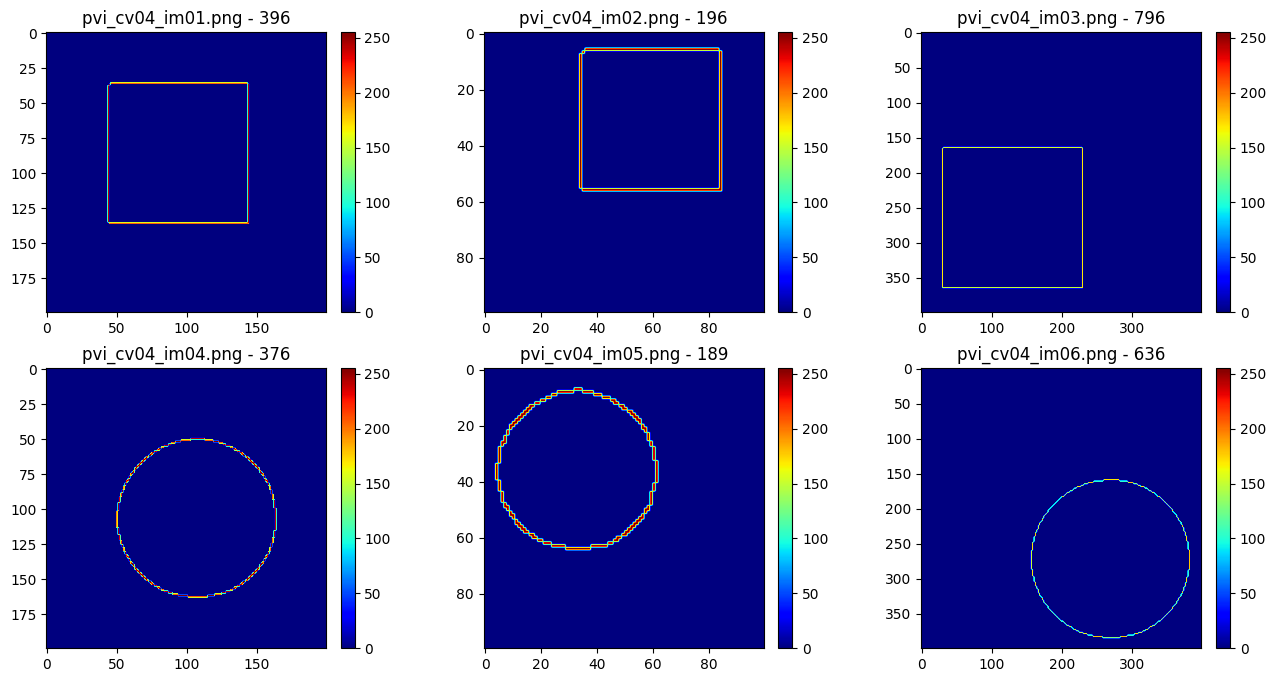

In [37]:
# funkcionální aplikace funkce na každý prvek pole
# Cany -> pole obrazku
names = [f.split('/')[-1] for f in picture_files]
uncanny_imgs = list(map(lambda x: cv2.Canny(x, 100, 256), imgs))

uncanny_pixel_counts = [count_white_pixels(binarize(img)) for img in uncanny_imgs]

names_with_count = [f"{name} - {count}" for name, count in zip(names, uncanny_pixel_counts)]

plot_imgs(
    imgs=uncanny_imgs, 
    titles=names_with_count, 
    rows=2, 
    cmaps=['jet' for _ in range(number_of_images)], 
    cbars=[True for _ in range(number_of_images)],
    figsize=(16, 8))

In [47]:
class Circle:
    name = "Circle"
    def from_area(area):
        return np.sqrt(area/np.pi)

    def to_circumference(radius):
        return 2*np.pi*radius

class Square:
    name = "Square"
    def from_area(area):
        return np.sqrt(area)

    def to_circumference(side):
        return 4*side

area = 10000

print("Circle:")
print("Area: ", area)
radius = Circle.from_area(area)
print("Radius: ", radius)
print("Circumference: ", Circle.to_circumference(radius))
print()
print("Square:")
print("Area: ", area)
side = Square.from_area(area)
print("Side: ", side)
print("Circumference: ", Square.to_circumference(side))

Circle:
Area:  10000
Radius:  56.41895835477563
Circumference:  354.49077018110324

Square:
Area:  10000
Side:  100.0
Circumference:  400.0


In [86]:
# rozlieni obrazcu
def classify_image(area, circumference, bias = 0):
    shapes = [Square, Circle]
    calculated_side = [shape.from_area(area) for shape in shapes]
    calculated_circumferences = [shape.to_circumference(side) for shape, side in zip(shapes, calculated_side)]
    
    # get the smaler difference
    differences = [abs(calculated_circumference - (circumference-bias)) for calculated_circumference in calculated_circumferences]
    if (False):
        print("circumference: ", circumference-bias)
        print("Calculated: ", [round(calculated_radius, 2) for calculated_radius in calculated_circumferences])
        print("Differences: ", [round(diff, 2) for diff in differences])
    min_diff_index = differences.index(min(differences))

    return shapes[min_diff_index].name

area = 10000
square_circumferences = [396, 376]
valid_shapes = ["Square", "Circle"]

area = 2500
square_circumferences = [196, 189]
valid_shapes = ["Square", "Circle"]

bias = 5
for circumference in square_circumferences:
    print(f"Area: {area}, Circumference: {circumference} -> {classify_image(area, circumference, bias)}")
    print()


Area: 2500, Circumference: 196 -> Square

Area: 2500, Circumference: 189 -> Circle



In [87]:
for name, pixel_count, uncanny_pixel_count in zip(names, pixel_counts, uncanny_pixel_counts):
    print(f"Image: {name}")
    print(f"Original: {pixel_count}")
    print(f"Uncanny: {uncanny_pixel_count}")
    print(f"Classification: {classify_image(pixel_count, uncanny_pixel_count, bias)}")
    print()

Image: pvi_cv04_im01.png
Original: 10000
Uncanny: 396
Classification: Square

Image: pvi_cv04_im02.png
Original: 2500
Uncanny: 196
Classification: Square

Image: pvi_cv04_im03.png
Original: 40000
Uncanny: 796
Classification: Square

Image: pvi_cv04_im04.png
Original: 10000
Uncanny: 376
Classification: Circle

Image: pvi_cv04_im05.png
Original: 2500
Uncanny: 189
Classification: Circle

Image: pvi_cv04_im06.png
Original: 40000
Uncanny: 636
Classification: Circle

